<!-- This should be added to the overrides/main.html and improved-->
<div class="grid cards" markdown>

- <svg xmlns="http://www.w3.org/2000/svg" height="50" width="50" viewBox="0 0 488 512"><!--!Font Awesome Free 6.6.0 by @fontawesome - https://fontawesome.com License - https://fontawesome.com/license/free Copyright 2024 Fonticons, Inc.--><path fill="#2094F3" d="M488 261.8C488 403.3 391.1 504 248 504 110.8 504 0 393.2 0 256S110.8 8 248 8c66.8 0 123 24.5 166.3 64.9l-67.5 64.9C258.5 52.6 94.3 116.6 94.3 256c0 86.5 69.1 156.6 153.7 156.6 98.2 0 135-70.4 140.8-106.9H248v-85.3h236.1c2.3 12.7 3.9 24.9 3.9 41.4z"/></svg>
<a href="https://colab.research.google.com/github/AmbiqAI/heartkit/blob/main/docs/guides/byot.ipynb" class="md-content__button md-icon" style="color: #2094F3;">
    View in Colab
</a>

- <svg xmlns="http://www.w3.org/2000/svg" height="50" width="50" viewBox="0 0 496 512"><!--!Font Awesome Free 6.6.0 by @fontawesome - https://fontawesome.com License - https://fontawesome.com/license/free Copyright 2024 Fonticons, Inc.--><path fill="#2094F3" d="M165.9 397.4c0 2-2.3 3.6-5.2 3.6-3.3 .3-5.6-1.3-5.6-3.6 0-2 2.3-3.6 5.2-3.6 3-.3 5.6 1.3 5.6 3.6zm-31.1-4.5c-.7 2 1.3 4.3 4.3 4.9 2.6 1 5.6 0 6.2-2s-1.3-4.3-4.3-5.2c-2.6-.7-5.5 .3-6.2 2.3zm44.2-1.7c-2.9 .7-4.9 2.6-4.6 4.9 .3 2 2.9 3.3 5.9 2.6 2.9-.7 4.9-2.6 4.6-4.6-.3-1.9-3-3.2-5.9-2.9zM244.8 8C106.1 8 0 113.3 0 252c0 110.9 69.8 205.8 169.5 239.2 12.8 2.3 17.3-5.6 17.3-12.1 0-6.2-.3-40.4-.3-61.4 0 0-70 15-84.7-29.8 0 0-11.4-29.1-27.8-36.6 0 0-22.9-15.7 1.6-15.4 0 0 24.9 2 38.6 25.8 21.9 38.6 58.6 27.5 72.9 20.9 2.3-16 8.8-27.1 16-33.7-55.9-6.2-112.3-14.3-112.3-110.5 0-27.5 7.6-41.3 23.6-58.9-2.6-6.5-11.1-33.3 2.6-67.9 20.9-6.5 69 27 69 27 20-5.6 41.5-8.5 62.8-8.5s42.8 2.9 62.8 8.5c0 0 48.1-33.6 69-27 13.7 34.7 5.2 61.4 2.6 67.9 16 17.7 25.8 31.5 25.8 58.9 0 96.5-58.9 104.2-114.8 110.5 9.2 7.9 17 22.9 17 46.4 0 33.7-.3 75.4-.3 83.6 0 6.5 4.6 14.4 17.3 12.1C428.2 457.8 496 362.9 496 252 496 113.3 383.5 8 244.8 8zM97.2 352.9c-1.3 1-1 3.3 .7 5.2 1.6 1.6 3.9 2.3 5.2 1 1.3-1 1-3.3-.7-5.2-1.6-1.6-3.9-2.3-5.2-1zm-10.8-8.1c-.7 1.3 .3 2.9 2.3 3.9 1.6 1 3.6 .7 4.3-.7 .7-1.3-.3-2.9-2.3-3.9-2-.6-3.6-.3-4.3 .7zm32.4 35.6c-1.6 1.3-1 4.3 1.3 6.2 2.3 2.3 5.2 2.6 6.5 1 1.3-1.3 .7-4.3-1.3-6.2-2.2-2.3-5.2-2.6-6.5-1zm-11.4-14.7c-1.6 1-1.6 3.6 0 5.9 1.6 2.3 4.3 3.3 5.6 2.3 1.6-1.3 1.6-3.9 0-6.2-1.4-2.3-4-3.3-5.6-2z"/></svg>
<a href="https://github.com/AmbiqAI/heartkit/blob/main/docs/guides/byot.ipynb" class="md-content__button md-icon" style="color: #2094F3;">
    GitHub source
</a>

</div>

# Bring-Your-Own-Task (BYOT)

__Date created:__ 2024/08/15 

__Last Modified:__ 2024/08/15 

__Description:__ Create custom task for HeartKit end-to-end

## Overview 

In this notebook, we provide a complete walkthrough of creating a custom task. To keep things simple, we will create a task that will predict heart rate from raw ECG signal.

Below we outline the high-level steps to create a custom task:

1. Identify datasets and create corresponding dataloaders (e.g. PTB-XL)
2. Create data pipeline for training, validation, and test sets
3. Implement task routines for modes: __train__, __evaluate__, __export__ and optionally __demo__. 

In this example, we will implement only __train__ and __evaluate__ modes.

__Datasets__

- **[PTB-XL](https://ambiqai.github.io/heartkit/datasets/ptbxl/)**: The PTB-XL is a large publicly available electrocardiography dataset. 
It contains 21837 clinical 12-lead ECGs from 18885 patients of 10 second length. The ECGs are sampled at 500 Hz and are annotated by up to two cardiologists.


In [1]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import random
from typing import Generator
from collections.abc import Iterable
from pathlib import Path
import tempfile

import keras
import heartkit as hk
import physiokit as pk
import tensorflow as tf
import numpy as np
import numpy.typing as npt
import helia_edge as helia
import matplotlib.pyplot as plt

2024-08-16 15:31:46.467589: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-16 15:31:46.475433: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-16 15:31:46.477772: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Be sure to set the dataset path to the correct location
os.environ["HK_DATASET_PATH"] = os.getenv("HK_DATASET_PATH", "./datasets")

plot_theme = hk.utils.dark_theme
helia.utils.silence_tensorflow()
_ = hk.utils.setup_plotting(plot_theme)

## 1. Create Dataloaders

We will create a dataloader class for the dataset __PTB-XL__ since it provides heart beat locations via `blabels`. 

Given a raw ECG signal, we will compute the heart rate given the beat locations in the frame. The rate will be calculated based on the RR intervals using PhysioKit. The output will be the ecg signal and the heart rate in beats per second.


In [3]:
class PtbxlDataloader(hk.HKDataloader):
    def __init__(self, ds: hk.datasets.PtbxlDataset, **kwargs):
        """Dataloader for PTB-XL to generate HeartRateTask data."""
        super().__init__(ds=ds, **kwargs)

    def patient_data_generator(
        self,
        patient_id: int,
        samples_per_patient: int,
    ):
        # Compute input size (might be different due to sampling rate)
        input_size = int(np.ceil((self.ds.sampling_rate / self.sampling_rate) * self.frame_size))

        with self.ds.patient_data(patient_id) as h5:
            ecg = h5["data"][:]
            # Beat locations. Convert 100Hz to ds.sampling_rate
            blabels = h5["blabels"][:, 0] * (self.ds.sampling_rate / 100.0)
        # END WITH

        for _ in range(samples_per_patient):
            # Select random lead and frame location
            lead = random.choice(self.ds.leads)
            frame_start = np.random.randint(0, ecg.shape[1] - input_size)
            frame_end = frame_start + input_size

            # Compute BPM by selecting beats within frame, computing RR intervals and averaging
            frame_blabels = blabels[(blabels >= frame_start) & (blabels < frame_end)]
            rri = pk.ecg.compute_rr_intervals(frame_blabels)
            bpm = 60.0 / (np.nanmean(rri) / self.ds.sampling_rate)

            # Extract ecg frame
            x = ecg[lead, frame_start:frame_end].copy()

            # Resample if needed
            if self.ds.sampling_rate != self.sampling_rate:
                x = pk.signal.resample_signal(x, self.ds.sampling_rate, self.sampling_rate, axis=0)
                x = x[: self.frame_size]  # Ensure frame size

            x = np.nan_to_num(x).astype(np.float32)
            x = x.reshape(-1, 1)
            y = bpm / 60.0  # Make beats per second
            yield x, y
        # END FOR

    def data_generator(
        self,
        patient_ids: list[int],
        samples_per_patient: int | list[int],
        shuffle: bool = False,
    ) -> Generator[tuple[npt.NDArray, npt.NDArray], None, None]:
        if isinstance(samples_per_patient, Iterable):
            samples_per_patient = samples_per_patient[0]
        for pt_id in helia.utils.uniform_id_generator(patient_ids, shuffle=shuffle):
            for x, y in self.patient_data_generator(pt_id, samples_per_patient):
                yield x, y
            # END FOR
        # END FOR

### Visualize output of dataloader

We will grab a single sample from the dataloader and visualize the output.

In [4]:
ds = hk.DatasetFactory.get("ptbxl")(path=Path(os.environ["HK_DATASET_PATH"]) / "ptbxl")
dl = PtbxlDataloader(
    ds=ds,
    frame_size=4000,
    sampling_rate=500,
)

In [5]:
patient_ids = np.random.permutation(ds.patient_ids)
x, y = next(dl.data_generator(patient_ids=patient_ids, samples_per_patient=1))

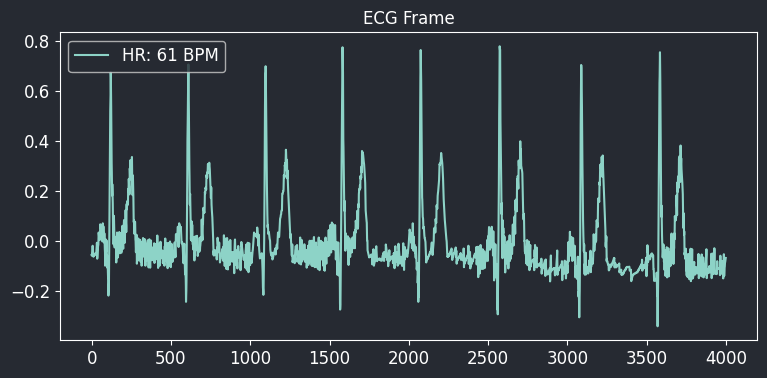

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
ax.plot(x, label=f"HR: {60 * y:0.0f} BPM")
ax.set_title("ECG Frame")
ax.legend()
fig.show()

### Register dataloaders to factory

We will then create a simple DataloaderFactory to ease the creation of dataloaders based on dataset names.

In [7]:
DataloaderFactory = helia.utils.create_factory(factory="BYOT.DataloaderFactory", type=hk.HKDataloader)
DataloaderFactory.register("ptbxl", PtbxlDataloader)

## 2. Create Data Pipeline

We will create a data pipeline that will be used to train and evaluate the model. For each dataset, we will:
1. Load the dataset via `hk.DatasetFactory`
1. Split the dataset patients into training and validation sets
1. Load the corresponding dataloader via `hk.DataloaderFactory` and create a `tf.data.Dataset` for training and validation

Once each dataset has a pair of training and validation datasets, we will combine them into a single training and validation dataset. At this point we will then extend the pipeline by adding the following:
1. Shuffle the dataset (if training)
1. Batch the dataset
1. Apply augmentations/preprocessing (if any)
1. Prefetch the dataset

Lastly, for the validation set will cache which will (1) speed up the evaluation process and (2) ensure that the same validation set is used for each epoch with fixed size.


In [8]:
def create_data_pipeline(
    ds: tf.data.Dataset,
    sampling_rate: int,
    batch_size: int,
    buffer_size: int | None = None,
    augmentations: list[hk.NamedParams] | None = None,
) -> tf.data.Dataset:
    """Transforms a dataset into a pipeline with augmentations.

    Args:
        ds(tf.data.Dataset): Input dataset.
        sampling_rate(int): Sampling rate of the dataset.
        batch_size(int): Batch size.
        buffer_size(int | None): Buffer size for shuffling.
        augmentations(list[hk.NamedParams] | None): List of augmentations to apply.

    Returns:
        tf.data.Dataset: Augmented dataset
    """
    if buffer_size:
        ds = ds.shuffle(
            buffer_size=buffer_size,
            reshuffle_each_iteration=True,
        )
    if batch_size:
        ds = ds.batch(
            batch_size=batch_size,
            drop_remainder=True,
            num_parallel_calls=tf.data.AUTOTUNE,
        )
    augmenter = hk.datasets.create_augmentation_pipeline(augmentations, sampling_rate=sampling_rate)

    ds = (
        ds.map(
            lambda data, labels: {
                "data": tf.cast(data, "float32"),
                "labels": tf.cast(labels, "float32"),
            },
            num_parallel_calls=tf.data.AUTOTUNE,
        )
        .map(
            augmenter,
            num_parallel_calls=tf.data.AUTOTUNE,
        )
        .map(
            lambda data: (data["data"], data["labels"]),
            num_parallel_calls=tf.data.AUTOTUNE,
        )
    )
    return ds.prefetch(tf.data.AUTOTUNE)


def load_train_datasets(
    datasets: list[hk.HKDataset],
    dataloaderFactory: helia.utils.ItemFactory[hk.HKDataloader],
    params: hk.HKTaskParams,
) -> tuple[tf.data.Dataset, tf.data.Dataset]:
    """Loads training and validation datasets.

    Args:
        datasets(list[hk.HKDataset]): List of datasets to load.
        dataloaderFactory(helia.utils.ItemFactory[hk.HKDataloader]): Factory to create dataloaders.
        params(hk.HKTaskParams): Task parameters.

    Returns:
        tuple[tf.data.Dataset, tf.data.Dataset]: Training and validation datasets.
    """

    # This will load each dataset/dataloader, split subjects, and merge into single tf.data.Dataset
    train_ds, val_ds = hk.tasks.utils.load_train_dataloader_split(datasets, params, factory=DataloaderFactory)

    # Create training and validation pipelines
    train_ds = create_data_pipeline(
        ds=train_ds,
        sampling_rate=params.sampling_rate,
        batch_size=params.batch_size,
        buffer_size=params.buffer_size,
        augmentations=params.augmentations + params.preprocesses,
    )

    val_ds = create_data_pipeline(
        ds=val_ds,
        sampling_rate=params.sampling_rate,
        batch_size=params.batch_size,
        augmentations=params.preprocesses,
    )

    # Cache validation dataset
    val_steps_per_epoch = params.val_size // params.batch_size if params.val_size else params.val_steps_per_epoch
    val_steps_per_epoch = val_steps_per_epoch or 50
    val_ds = val_ds.take(val_steps_per_epoch).cache()

    return train_ds, val_ds

## 3. Create task routines

We will create a task that will predict heart rate from raw ECG signal. The task will have the following modes:
1. __train__: Train the model
1. __evaluate__: Evaluate the model


In [ ]:
def train(params: hk.HKTaskParams):
    """Train  model

    Args:
        params (hk.HKTaskParams): Training parameters
    """
    os.makedirs(params.job_dir, exist_ok=True)

    logger = helia.utils.setup_logger(__name__, level=params.verbose, file_path=params.job_dir / "train.log")
    logger.debug(f"Creating working directory in {params.job_dir}")

    params.seed = helia.utils.set_random_seed(params.seed)
    logger.debug(f"Random seed {params.seed}")

    with open(params.job_dir / "train_config.json", "w", encoding="utf-8") as fp:
        fp.write(params.model_dump_json(indent=2))

    params.num_classes = 1  # Regression
    feat_shape = (params.frame_size, 1)

    datasets = [hk.DatasetFactory.get(ds.name)(**ds.params) for ds in params.datasets]

    train_ds, val_ds = load_train_datasets(datasets=datasets, dataloaderFactory=DataloaderFactory, params=params)

    y_true = np.concatenate([y for _, y in val_ds.as_numpy_iterator()])
    y_true = np.argmax(y_true, axis=-1).flatten()

    inputs = keras.Input(shape=feat_shape, name="input", dtype="float32")

    # Load existing model
    if params.resume and params.model_file:
        logger.debug(f"Loading model from file {params.model_file}")
        model = helia.models.load_model(params.model_file)
        params.model_file = None
    else:
        logger.debug("Creating model from scratch")
        if params.architecture is None:
            raise ValueError("Model architecture must be specified")
        model = hk.ModelFactory.get(params.architecture.name)(
            inputs=inputs,
            params=params.architecture.params,
            num_classes=params.num_classes,
        )
    # END IF

    flops = helia.metrics.flops.get_flops(model, batch_size=1, fpath=params.job_dir / "model_flops.log")

    t_mul = 1
    first_steps = (params.steps_per_epoch * params.epochs) / (np.power(params.lr_cycles, t_mul) - t_mul + 1)
    scheduler = keras.optimizers.schedules.CosineDecayRestarts(
        initial_learning_rate=params.lr_rate,
        first_decay_steps=np.ceil(first_steps),
        t_mul=t_mul,
        m_mul=0.5,
    )

    optimizer = keras.optimizers.Adam(scheduler)
    loss = keras.losses.MeanSquaredError()
    metrics = [
        keras.metrics.MeanAbsoluteError(name="mae"),
        keras.metrics.MeanSquaredError(name="mse"),
        keras.metrics.R2Score(name="rsq"),
    ]

    if params.model_file is None:
        params.model_file = params.job_dir / "model.keras"

    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    logger.debug(f"Model requires {flops / 1e6:0.2f} MFLOPS")

    model_callbacks = [
        keras.callbacks.EarlyStopping(
            monitor=f"val_{params.val_metric}",
            patience=max(int(0.25 * params.epochs), 1),
            mode="max" if params.val_metric == "f1" else "auto",
            restore_best_weights=True,
            verbose=min(params.verbose - 1, 1),
        ),
        keras.callbacks.ModelCheckpoint(
            filepath=str(params.model_file),
            monitor=f"val_{params.val_metric}",
            save_best_only=True,
            mode="max" if params.val_metric == "f1" else "auto",
            verbose=min(params.verbose - 1, 1),
        ),
        keras.callbacks.CSVLogger(params.job_dir / "history.csv"),
    ]

    history = model.fit(
        train_ds,
        steps_per_epoch=params.steps_per_epoch,
        verbose=params.verbose,
        epochs=params.epochs,
        validation_data=val_ds,
        callbacks=model_callbacks,
    )
    logger.debug(f"Model saved to {params.model_file}")

    helia.plotting.plot_history_metrics(
        history.history,
        metrics=["loss", metrics[0].name],
        save_path=params.job_dir / "history.png",
        title="Training History",
        stack=True,
        figsize=(9, 5),
    )

    # Summarize results
    rst = model.evaluate(val_ds, return_dict=True)
    logger.info("[VAL SET] " + ", ".join(f"{k.upper()}={v:.4f}" for k, v in rst.items()))

In [10]:
def evaluate(params: hk.HKTaskParams):
    """Evaluate model

    Args:
        params (HKTaskParams): Evaluation parameters
    """
    os.makedirs(params.job_dir, exist_ok=True)
    logger = helia.utils.setup_logger(__name__, level=params.verbose, file_path=params.job_dir / "test.log")
    logger.debug(f"Creating working directory in {params.job_dir}")

    params.seed = helia.utils.set_random_seed(params.seed)
    logger.debug(f"Random seed {params.seed}")

    datasets = [hk.DatasetFactory.get(ds.name)(**ds.params) for ds in params.datasets]

    _, test_ds = load_train_datasets(datasets=datasets, dataloaderFactory=DataloaderFactory, params=params)
    test_x = np.concatenate([x for x, _ in test_ds.as_numpy_iterator()])
    test_y = np.concatenate([y for _, y in test_ds.as_numpy_iterator()])

    logger.debug("Loading model")
    model = helia.models.load_model(params.model_file)

    logger.debug("Performing inference")
    rst = model.evaluate(test_ds, verbose=params.verbose, return_dict=True)
    logger.info("[TEST SET] " + ", ".join([f"{k.upper()}={v:.2%}" for k, v in rst.items()]))

    y_pred = model.predict(test_x)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
    ax.scatter(y_pred * 60, test_y * 60)
    ax.set_title("Predicted vs True BPM")
    ax.set_xlabel("Predicted BPM")
    ax.set_ylabel("True BPM")
    ax.annotate(f"R2={rst['rsq']:.2f}", xy=(0.05, 0.95), xycoords="axes fraction")

    fig.tight_layout()
    fig.show()
    fig.savefig(params.job_dir / "bpm_plot.png")

### Create HeartRateTask class and register it to the factory

In [11]:
class HeartRateTask(hk.HKTask):
    @staticmethod
    def train(params: hk.HKTaskParams):
        train(params)

    @staticmethod
    def evaluate(params: hk.HKTaskParams):
        evaluate(params)

    @staticmethod
    def export(params: hk.HKTaskParams) -> None:
        raise NotImplementedError("Export not implemented")

    @staticmethod
    def demo(params: hk.HKTaskParams) -> None:
        raise NotImplementedError("Demo not implemented")

In [12]:
hk.TaskFactory.register("heartrate", HeartRateTask)

In [13]:
for task_name in hk.TaskFactory.list():
    print(task_name)

rhythm
beat
segmentation
diagnostic
denoise
foundation
translate
heartrate


## 4. Let's test out the new task!

First we will create a task configuration with the following features:
* Frame Size: 8 seconds
* Dataset: PTB-XL
* Model: `EfficientNetV2` with 4 MBConv blocks each depth 1
* Batch Size: 256
* Buffer Size: 20,000
* Learning Rate: 1e-3
* Preprocess: Z-score normalization



In [14]:
params = hk.HKTaskParams(
    name="BYOT-HR",
    job_dir=Path(tempfile.gettempdir()) / "hk-byot-hr",
    verbose=1,
    datasets=[
        hk.NamedParams(
            name="ptbxl",
            params=dict(
                path=Path(os.environ["HK_DATASET_PATH"]) / "ptbxl",
            ),
        ),
    ],
    frame_size=4000,  # 8 seconds
    sampling_rate=500,  # 500Hz
    samples_per_patient=5,
    val_samples_per_patient=5,
    val_patients=0.2,
    val_size=10000,
    batch_size=256,
    buffer_size=20000,
    epochs=100,
    steps_per_epoch=50,
    lr_rate=1e-3,
    lr_cycles=1,
    val_metric="loss",
    preprocesses=[
        hk.NamedParams(
            name="layer_norm",
            params=dict(epsilon=0.01, name="znorm"),
        ),
    ],
    augmentations=[],
    architecture=hk.NamedParams(
        name="efficientnetv2",
        params=dict(
            input_filters=8,
            input_kernel_size=[1, 9],
            input_strides=[1, 2],
            blocks=[
                {"filters": 16, "depth": 1, "kernel_size": [1, 9], "strides": [1, 2], "ex_ratio": 1, "se_ratio": 2},
                {"filters": 24, "depth": 1, "kernel_size": [1, 9], "strides": [1, 2], "ex_ratio": 1, "se_ratio": 2},
                {"filters": 32, "depth": 1, "kernel_size": [1, 9], "strides": [1, 2], "ex_ratio": 1, "se_ratio": 2},
                {"filters": 40, "depth": 1, "kernel_size": [1, 9], "strides": [1, 2], "ex_ratio": 1, "se_ratio": 2},
            ],
            output_filters=0,
            include_top=True,
            use_logits=True,
        ),
    ),
)

In [19]:
task = hk.TaskFactory.get("heartrate")

### Train the model


I0000 00:00:1723822309.458226  626139 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723822309.478233  626139 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723822309.478319  626139 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723822309.479299  626139 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Epoch 1/100


I0000 00:00:1723822323.031206  626304 service.cc:146] XLA service 0x7471ec02c0b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1723822323.031237  626304 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9


 5/50 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 1.8535 - mae: 1.2239 - mse: 1.8535 - rsq: -20.3693

I0000 00:00:1723822328.955479  626304 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - loss: 1.4214 - mae: 1.1194 - mse: 1.4214 - rsq: -16.4093 - val_loss: 0.7500 - val_mae: 0.8469 - val_mse: 0.7500 - val_rsq: -8.4336
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.4457 - mae: 0.6133 - mse: 0.4457 - rsq: -4.2974 - val_loss: 0.0573 - val_mae: 0.1936 - val_mse: 0.0573 - val_rsq: 0.2792
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 0.0722 - mae: 0.2064 - mse: 0.0722 - rsq: 0.0739 - val_loss: 0.0206 - val_mae: 0.0998 - val_mse: 0.0206 - val_rsq: 0.7403
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 0.0411 - mae: 0.1526 - mse: 0.0411 - rsq: 0.4376 - val_loss: 0.0178 - val_mae: 0.0924 - val_mse: 0.0178 - val_rsq: 0.7758
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0388 - mae: 0.1436 - mse: 0.0388 - rsq: 0.5175 - val_loss: 0.0161 - val_mae: 0.0889 - val_mse: 0.0161 - val_rsq: 0.7972
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0316 - mae: 0.1323 - mse: 0.0316 - 

INFO     [VAL SET] LOSS=0.0030, MAE=0.0305, MSE=0.0030, RSQ=0.9621                                ]8;id=187434;file:///tmp/ipykernel_626139/3247659150.py\3247659150.py]8;;\:]8;id=786914;file:///tmp/ipykernel_626139/3247659150.py#114\114]8;;\

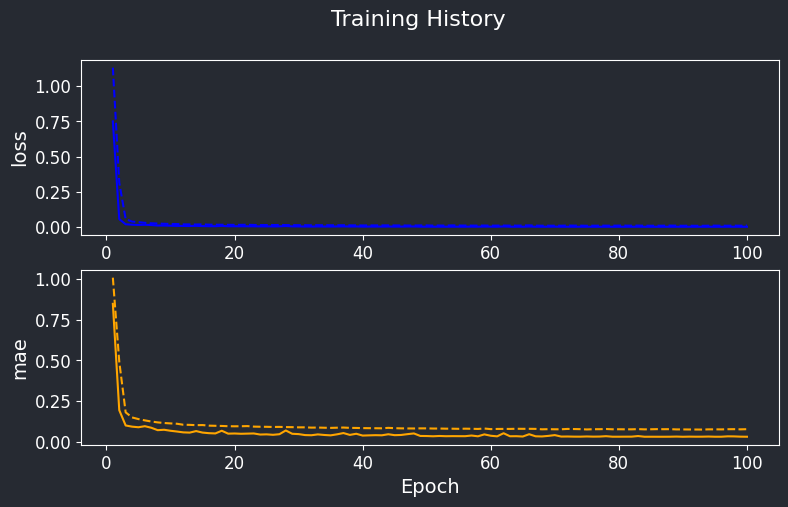

In [15]:
task.train(params)

### Finally we will evaluate the model

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0030 - mae: 0.0307 - mse: 0.0030 - rsq: 0.9639


INFO     [TEST SET] LOSS=0.30%, MAE=3.05%, MSE=0.30%, RSQ=96.21%                                   ]8;id=872574;file:///tmp/ipykernel_626139/3848634147.py\3848634147.py]8;;\:]8;id=819072;file:///tmp/ipykernel_626139/3848634147.py#29\29]8;;\

312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


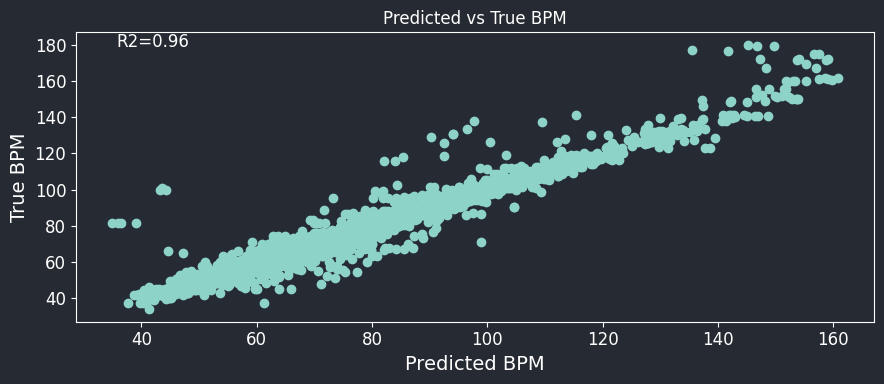

In [20]:
task.evaluate(params)